In [1]:
from lib_fetaure_analysis import Features
from defect_analysis import Test
from pathlib import Path
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import torch as Torch
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

In [48]:
pathCartellaTresh = Path('/home/gabro/GrapheDetectProject/cartellaTrash')
pathCartellaContours = Path('/home/gabro/GrapheDetectProject/contours')
shapes = Features.from_thresh_to_contours_print_features(pathCartellaTresh,pathCartellaContours)
for shape in shapes:
    print("Shape features:")
    for key in shape:
        print(key, ' : ', shape[key])
    print()

df = pd.DataFrame.from_records(shapes)
df.to_csv('/home/gabro/GrapheDetectProject/box_dataframe.csv')
print(df)
df2 = df.drop(df.columns[0],axis=1) #droppo la prima colonna che rappresenta i nomi (stringhe)
print(df2)
df2.to_csv('/home/gabro/GrapheDetectProject/no_name_dataframe.csv')


IndexError: list index out of range

In [2]:
pathCartellaTresh = Path('/home/gabro/GrapheDetectProject/cartellaTrash')
pathCartellaContours = Path('/home/gabro/GrapheDetectProject/contours')
shapes = Features.from_thresh_to_contours_print_features(pathCartellaTresh,pathCartellaContours)
# for shape in shapes:
#     print("Shape features:")
#     for key in shape:
#         print(key, ' : ', shape[key])
#     print()

df = pd.DataFrame.from_records(shapes)
df.to_csv('/home/gabro/GrapheDetectProject/box_dataframe.csv')
print("old df")
print(df)

# raggruppa le righe in base al nome dell'immagine e calcola la somma dell'area e del perimetro, e la media pesata per l'area degli altri parametri
groupedDf = df.groupby('nome_imm').apply(lambda x: pd.Series({
    'area_px': x['area_px'].sum(),  #somma semplice per area e perimetro 
    'num_pixels': x['num_pixels'].sum(),
    'perimeter_px': x['perimeter_px'].sum(),
    'circularity': (x['circularity'] * x['area_px']).sum() / x['area_px'].sum(),    #somma pesata per l'area per tutti gli altri 
    'solidity': (x['solidity'] * x['area_px']).sum() / x['area_px'].sum(),
    'compactness': (x['compactness'] * x['area_px']).sum() / x['area_px'].sum(),
    'feret_diameter': (x['feret_diameter'] * x['area_px']).sum() / x['area_px'].sum(),
    'eccentricity': (x['eccentricity'] * x['area_px']).sum() / x['area_px'].sum(),
}))

groupedDf.to_csv('/home/gabro/GrapheDetectProject/groupedDataframe.csv')
print("-----------------------------------------------------------------------------")
print("grouped dataframe")
print(groupedDf)

#aggiungo total_energy 
total_energy_df = pd.read_csv("/home/gabro/GrapheDetectProject/dataset_graphene.csv")

merged_df = groupedDf.merge(total_energy_df[['file_name', 'total_energy']], left_on='nome_imm', right_on='file_name')
merged_df = merged_df.drop('file_name', axis=1)

merged_df.to_csv('/home/gabro/GrapheDetectProject/energy_dataframe.csv')
print(merged_df)


IndexError: list index out of range

<Axes: >

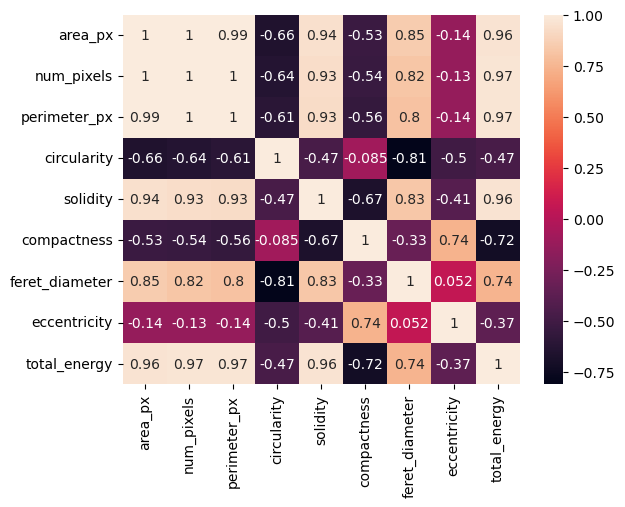

In [45]:
corr = merged_df.corr()
sns.heatmap(corr, annot=True)

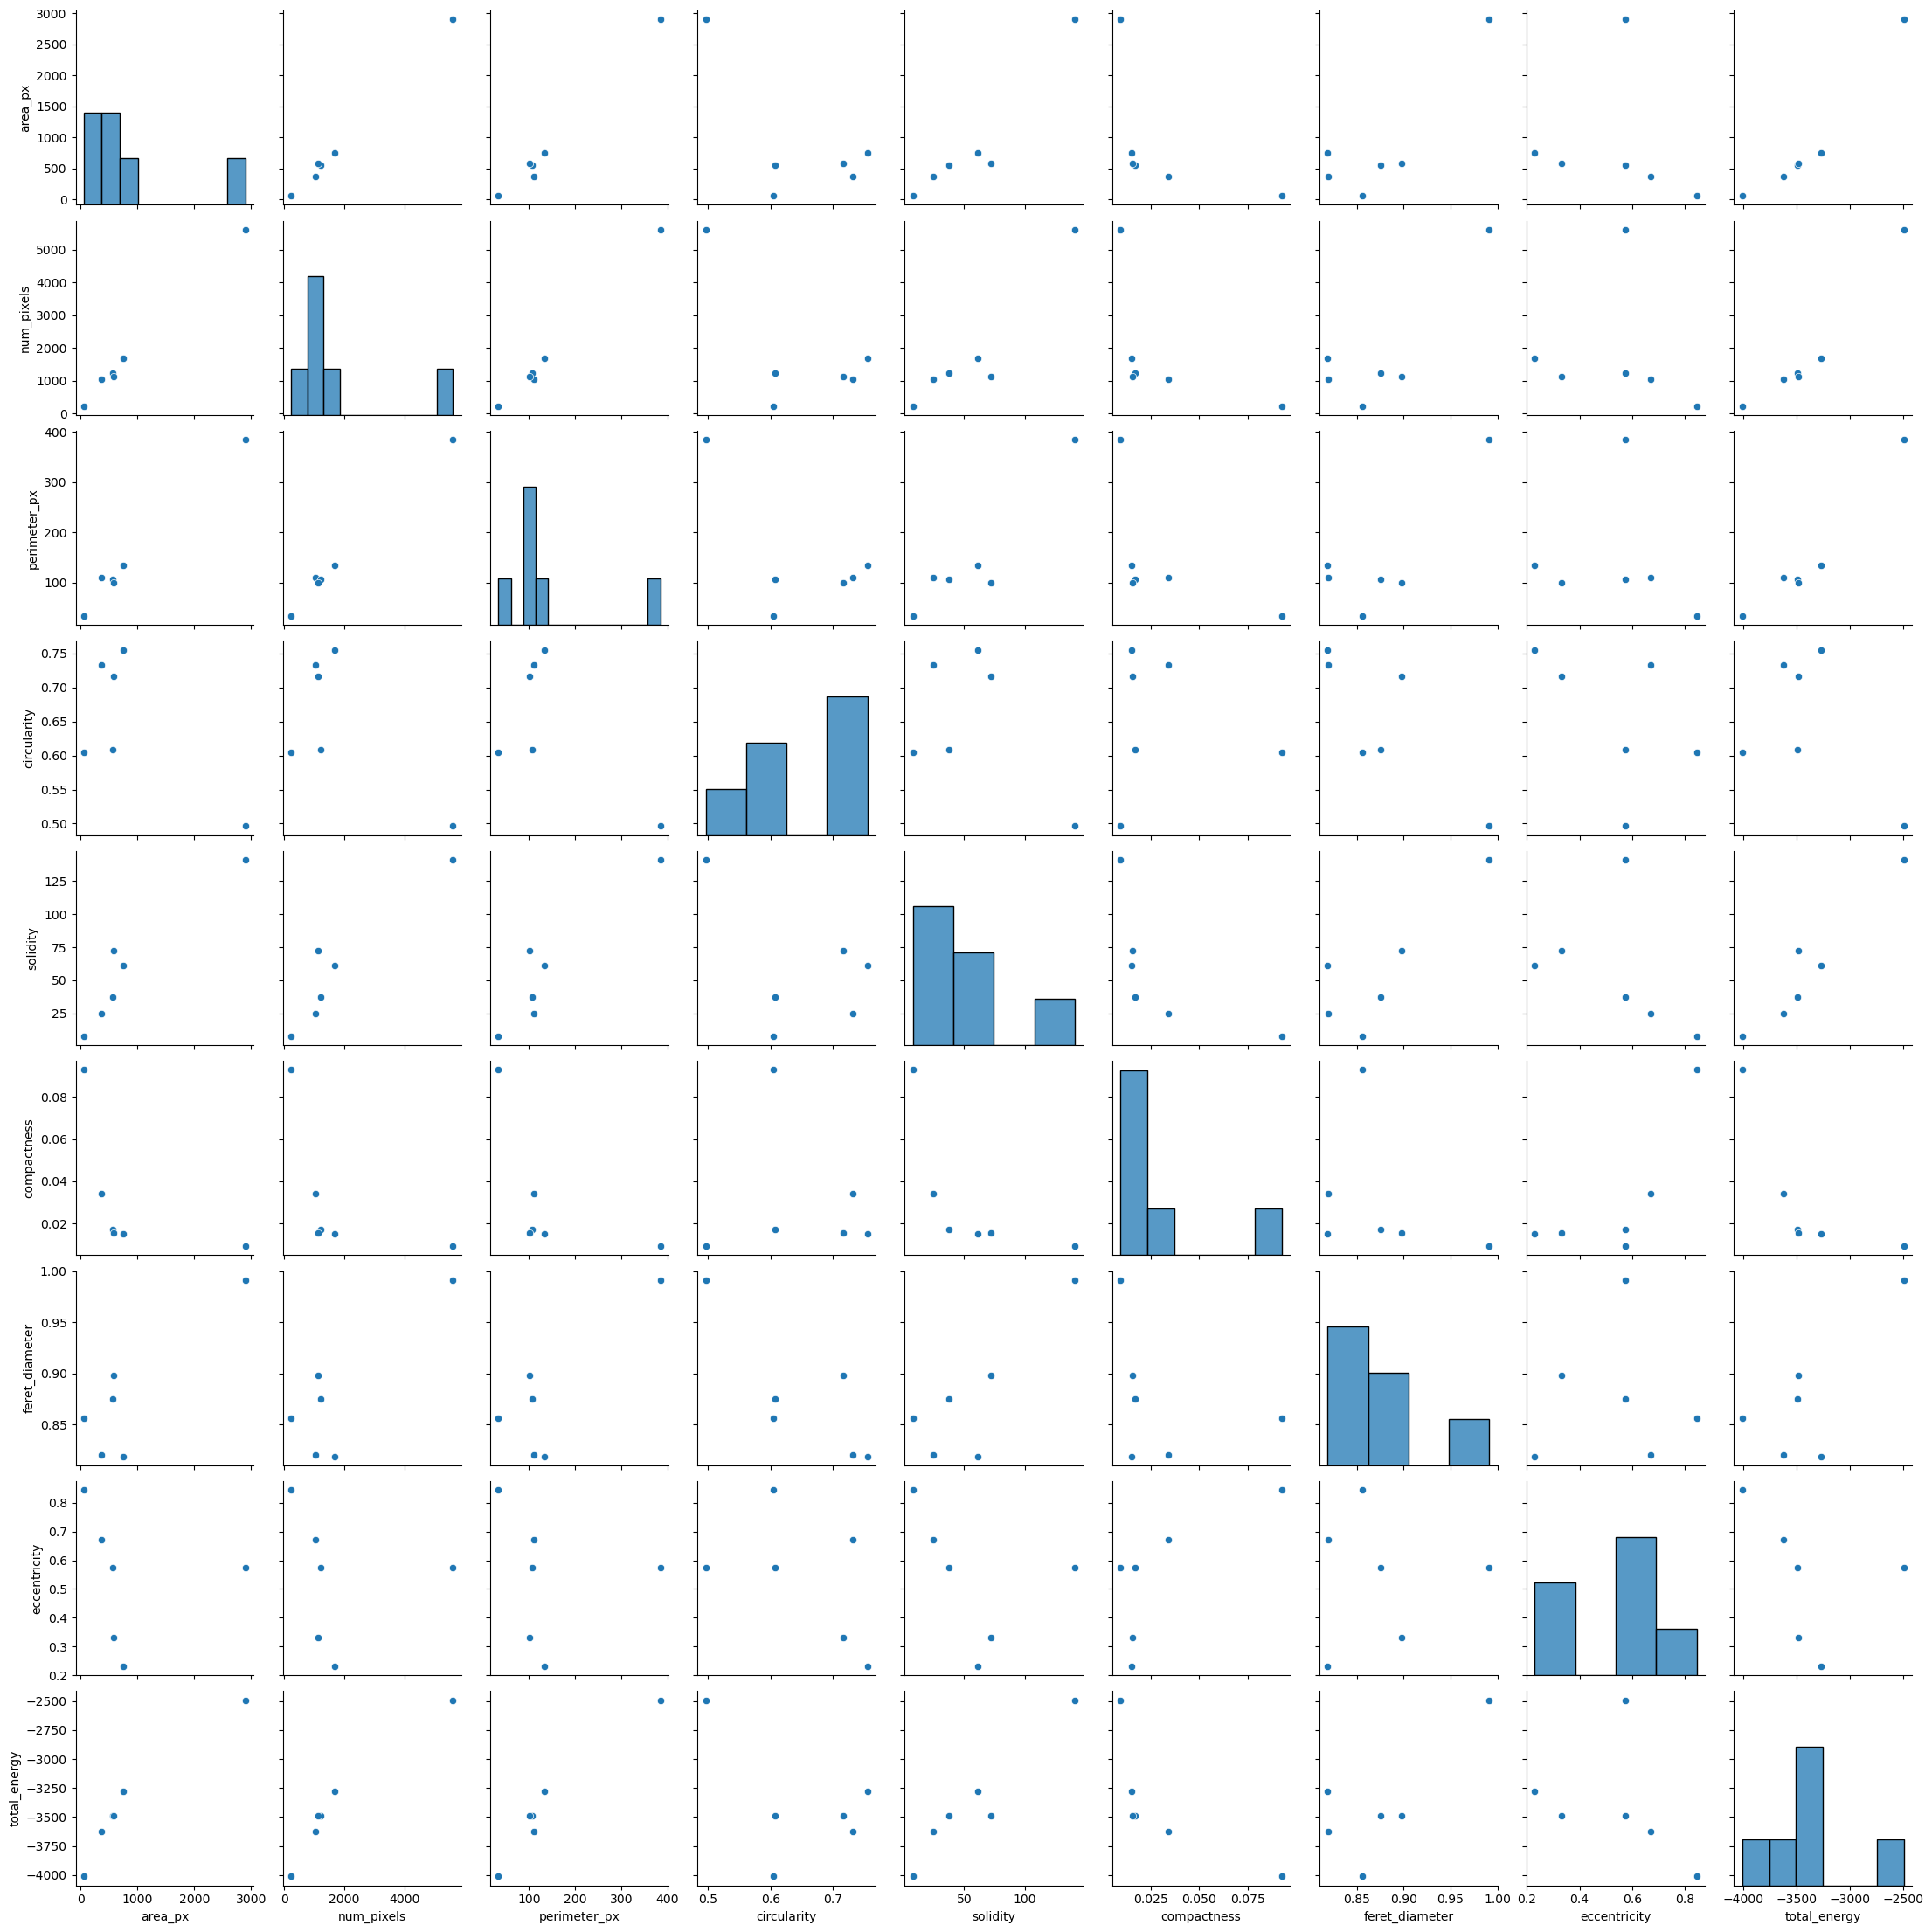

In [46]:
# # load data set
# df = sns.load_dataset('iris')

# Basic correlogram
sns.pairplot(merged_df)
plt.show()

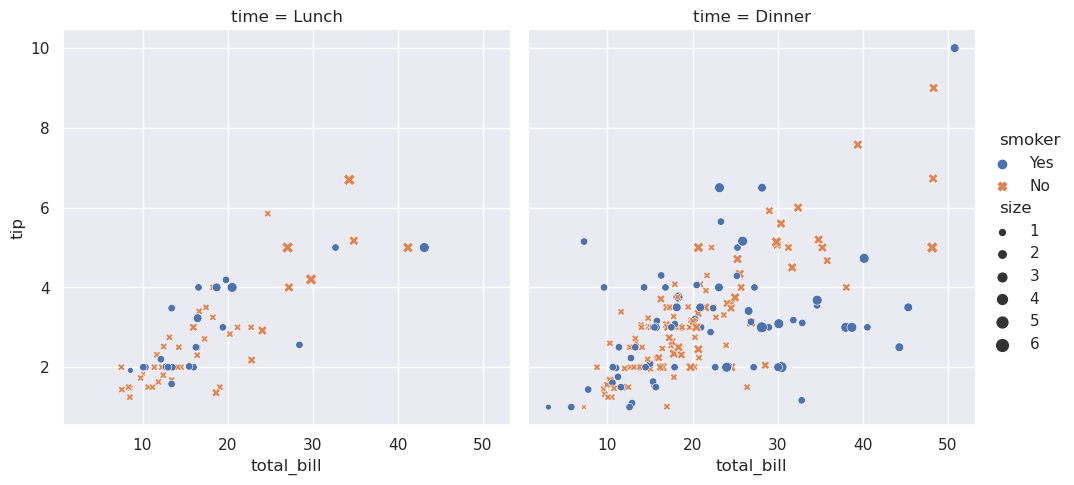

In [3]:
# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

# plt.show(sns)